# Exercises for Introduction to Quantum Computing

Name: Pugazharasu Anancia Devaneyan (s6puanan) <br />
Matriculation number: 3300280

In [3]:
import numpy as np
import qiskit as qi
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

from qiskit.visualization import plot_histogram

## 1. Quantum Fourier Transform

The quantum Fourier transform operation acting on a state is a unitary operation, thus for
$$\mathrm{qFT}^{\dagger}|\phi\rangle=|100\rangle$$
we simply act with a qFT on both sides of the equation to get,
$$|\phi\rangle =\mathrm{qFT}|100\rangle$$
Thus, to obtain the state, we simply need to evaluate the RHS. This can be done as the qFT in the computational basis is expressed as,
$$\mathrm{qFT}|j\rangle=\frac{1}{\sqrt{8}} \sum_{k=0}^7 e^{2 \pi i \frac{j k}{8}}|k\rangle$$

Therefore, we have
$$|\phi\rangle = \frac{\sqrt{2}}{4}|000\rangle+\left(-\frac{1}{4}-\frac{i}{4}\right)|001\rangle+\frac{\sqrt{2} i}{4}|010\rangle+\left(\frac{1}{4}-\frac{i}{4}\right)|011\rangle-\frac{\sqrt{2}}{4}|100\rangle+\left(\frac{1}{4}+\frac{i}{4}\right)|101\rangle-\frac{\sqrt{2} i}{4}|110\rangle+\left(-\frac{1}{4}+\frac{i}{4}\right)|111\rangle$$
The probability of measuring the output 100 from the state $|\phi\rangle$ is given by computing the inner product of $|\phi\rangle$ with $|100\rangle$,
$$ \langle 100 |\phi\rangle = {\left(-\frac{\sqrt{2}}{4}\right)}^{2} = \frac{1}{8}$$

The inverse qFT circuit can be implemented by simply reversing the order of unitaries and inverting the angles of the phase gates applied i.e. $R_{h} \rightarrow R^{-1}_{h}$, thus we have:

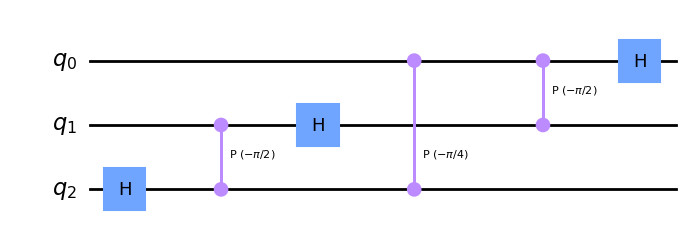

In [42]:
inv_qFT = QuantumCircuit(3)
inv_qFT.h(2)
inv_qFT.cp(-np.pi/2, 2, 1)
inv_qFT.h(1)
inv_qFT.cp(-np.pi/4, 2, 0)
inv_qFT.cp(-np.pi/2, 1, 0)
inv_qFT.h(0)
inv_qFT.draw('mpl')

In [21]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(np.pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

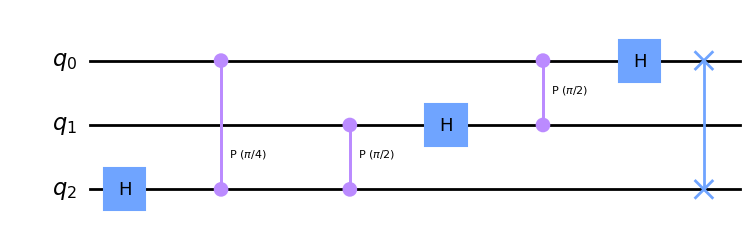

In [23]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

# Let's see how it looks:
qc = QuantumCircuit(3)
qft(qc,3)
qc.draw('mpl')

In [26]:
state = qi.quantum_info.Statevector.from_label('001')
state.draw(output='latex')

<IPython.core.display.Latex object>

In [28]:
state = state.evolve(qc)
state.draw(output='latex')

<IPython.core.display.Latex object>

## 2. Deutsch–Jozsa algorithm

We wish to implement an Oracle $U_f$ with the action
$$U_{f} | q_{0} q_{1} q_{2} \rangle = |q_{0}q_{1}(q_{2} \oplus f(q_{0},q_{1})) \rangle$$
This is given to us via the quantum circuit,

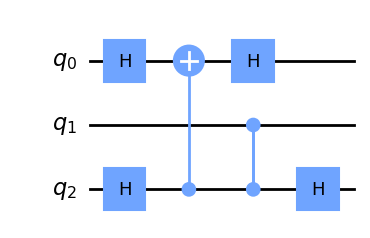

In [37]:
oracle = QuantumCircuit(3)
oracle.h(0)
oracle.h(2)
oracle.cx(2,0)
oracle.h(0)
oracle.cz(2,1)
oracle.h(2)
oracle.draw('mpl')

We can check if this does indeed implement the Oracle we desire by means of applying to an arbitary state,

In [35]:
state = qi.quantum_info.Statevector.from_label('001')
state = state.evolve(oracle)
state.draw(output='latex')

<IPython.core.display.Latex object>

Now that we have shown that the quantum circuit implements an Oracle, we can check if the Oracle is balanced or constant by means of implementing a truth table for it,
<center>

| $ q_0 q_1 q_2 $ | $U_f$ |
| - | - |
| 000 | 000 |
| 001 | 100 |
| 010 | 011 |
| 011 | 010 |
| 100 | 101 |
| 101 | 100 |
| 110 | 110 |
| 111 | 111 |

</center>

We can see that the Oracle is balanced!

In [1]:
n =3
input_state = "100"

In [ ]:
for qubit in range(len(input_state)):
    if input_state[i] == '1'

In [5]:
CNOT_1 = Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1],[0, 0, 1, 0]])
#CNOT_2 = Matrix([[0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0],[0, 0, 0, 1]])
CNOT_3 = Matrix([[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0],[0, 1, 0, 0]])
Hadamard = 0.5 * Matrix([[1, 1, 1, 1], [1, -1, 1, -1], [1, 1, -1, -1],[1, -1, -1, 1]])
Hadamard_1 = Matrix([[two, two, 0, 0], [two, -two, 0, 0], [0, 0, 1, 0],[0, 0, 0, 1]])
Hadamard_2 = Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, two, two],[0, 0, two, -two]])

In [12]:
state_vector_1 = Matrix([[two], [0], [-two],[0]])
display(state_vector_1)

Matrix([
[ 0.707106781186547],
[                 0],
[-0.707106781186547],
[                 0]])

In [13]:
display(CNOT_3*(Hadamard_2 * state_vector_1))

Matrix([
[0.707106781186547],
[             -0.5],
[             -0.5],
[                0]])

In [42]:
CNOT_4 = Hadamard * CNOT_1 * Hadamard

Thus, to prove the identity we shall first evaluate the LHS,

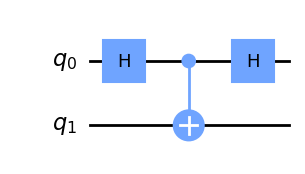

In [20]:
circ_3 = QuantumCircuit(2)
circ_3.h(0)
circ_3.cx(0,1)
circ_3.h(0)
circ_3.draw('mpl')

this can be written as a matrix product,
$$(\mathbb{I} \otimes H )CNOT_{1,2}(\mathbb{I} \otimes H ) = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}}
\end{pmatrix} \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix} \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}}
\end{pmatrix}$$

$$(\mathbb{I} \otimes H )CNOT_{1,2}(\mathbb{I} \otimes H ) = $$

In [35]:
display(Hadamard_1 * CNOT_1 * Hadamard_1 * state_vector)

Matrix([
[1.0*a],
[1.0*b],
[    d],
[    c]])

Now to evaluate the RHS,

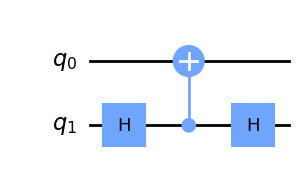

In [19]:
circ_4 = QuantumCircuit(2)
circ_4.h(1)
circ_4.cx(1,0)
circ_4.h(1)
circ_4.draw('mpl')

this can be written as a matrix product,
$$(H \otimes \mathbb{I})CNOT_{2,1}(H \otimes \mathbb{I}) = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}}
\end{pmatrix} \begin{pmatrix}
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix} \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}}
\end{pmatrix}$$

$$(H \otimes \mathbb{I})CNOT_{2,1}(H \otimes \mathbb{I}) = $$

In [43]:
display(Hadamard_2 * CNOT_4 * Hadamard_2 * state_vector)

Matrix([
[                                    1.0*a],
[0.707106781186547*c - 0.707106781186547*d],
[      0.707106781186547*b + 0.5*c + 0.5*d],
[     -0.707106781186547*b + 0.5*c + 0.5*d]])

Proving their equivalence upto the equivalence of statevectors and unitary matrices using qiskit,

In [36]:
#checking if both the circuits produce the same state vectors
from qiskit.quantum_info import Statevector
Statevector.from_instruction(circ_3).equiv(Statevector.from_instruction(circ_4))

True

In [38]:
#checking if both the circuits produce the unitary matrix
backend_sim = Aer.get_backend('unitary_simulator')
job_sim = qi.execute([circ_3, circ_4], backend_sim)
result_sim = job_sim.result()
unitary1 = result_sim.get_unitary(circ_3)
unitary2 = result_sim.get_unitary(circ_4)

np.allclose(unitary1, unitary2) 

True

## 4. No-Cloning Theorem

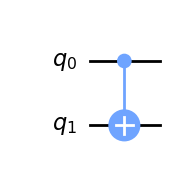

In [37]:
circ_5 = QuantumCircuit(2)
circ_5.cx(0,1)
circ_5.draw('mpl')

In [46]:
state = qi.quantum_info.Statevector.from_label('01')
state.draw(output='latex')

<IPython.core.display.Latex object>

In [49]:
state = state.evolve(circ_5)
state.draw(output='latex')

<IPython.core.display.Latex object>

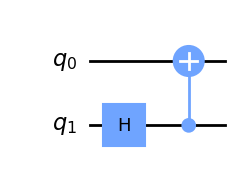

In [51]:
circ_6 = QuantumCircuit(2)
circ_6.h(1)
circ_6.cx(1,0)
circ_6.draw('mpl')

In [56]:
state_2 = qi.quantum_info.Statevector.from_label('0-')
state_2.draw(output='latex')

<IPython.core.display.Latex object>

In [57]:
state_2 = state_2.evolve(circ_6)
state_2.draw(output='latex')

<IPython.core.display.Latex object>